In [1]:
""" 
    Imports Section
    
"""

import pandas as pd 
import json as js
import numpy as np
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
""" 
    Reading Files Section
    
"""

file = "~\\Documents\\PRACTICA_PYTHON\\BaseDeDatos\\tmdb_5000_credits.csv"
file2 = "~\\Documents\\PRACTICA_PYTHON\\BaseDeDatos\\tmdb_5000_movies.csv"

credits = pd.read_csv(file, encoding="cp437", delimiter = ',')
movies = pd.read_csv(file2, encoding="cp437", delimiter = ',')

In [3]:
""" 
    Creation of Dataframes Section
    
    Objetive: Creating an unique Dataframe (dfPrincipal) containing all data with single value and not lists.
    
"""

# We change the name of the column to movie_id to be able to merge by that column after
movies = movies.rename(columns= {'id': 'movie_id'})

# Merging both .csv
dfMerge = pd.merge(credits, movies, on='movie_id')

# This is vital for running the whole program. Our dataframe contains 5000 registers that need to be lopped later.
# Please modify the head if you don't want our laptop to die while looping ;) 
dfMerge = dfMerge.head(50)

# Setting up our main dataframe
dfMain = dfMerge[['movie_id','original_title', 'original_language', 'budget', 'popularity', 
                       'release_date', 'revenue', 'runtime', 'status','vote_average', 
                       'vote_count']]

dfMain = pd.DataFrame(dfMain)

print("Length of the dataframe: ", len(dfMain))

Length of the dataframe:  50


In [4]:
""" 
    Creation of Dataframes Section
    
    Objetive: Create Dataframes for each JSON list contained in the .CSVs for a better data organization.
    
    Note: This process can use a lot of memory. To save memory, every variable is emptied after is used.
    
"""

# Obtaining a dataframe containing only the json Lists.
df = dfMerge[['movie_id', 'cast', 'crew', 'genres', 'keywords', 'production_countries', 'spoken_languages']]

# Initialising empty dataframes
dfCast = []
dfCrew = []
dfGenres = []
dfKW = []
dfPCountries = []
dfSLanguages = []

# For a better data organisation. It is necesary that every dataframe created from json contains movie_id
for i in range(len(df)):
    # Obtaining the movie_id
    id = df['movie_id'][i]
    
    # Setting up the casts dataframe
    castJson = pd.read_json(df['cast'][i])
    castJson['movie_id'] = id
    dfCast.append(castJson[['movie_id', 'name', 'character', 'gender']])
    castJson = [] 
    
    # Setting up the crew dataframe
    crewJson = pd.read_json(df['crew'][i])
    crewJson['movie_id'] = id
    dfCrew.append(crewJson[['movie_id', 'name', 'gender', 'department', 'job']])
    crewJson = []
    
    # Setting up the genres dataframe
    genresJson = pd.read_json(df['genres'][i])
    genresJson['movie_id'] = id
    dfGenres.append(genresJson[['movie_id', 'name']])
    genresJson = []
    
    # Setting up the keywords dataframe
    kwJson = pd.read_json(df['keywords'][i])
    kwJson['movie_id'] = id
    dfKW.append(kwJson[['movie_id', 'name']])
    kwJson = []
    
    # Setting up the production_countries dataframe
    pcJson = pd.read_json(df['production_countries'][i])
    pcJson['movie_id'] = id
    dfPCountries.append(pcJson[['movie_id', 'name']])
    pcJson = []
    
    # Setting up the spoken_languages dataframe
    slJson = pd.read_json(df['spoken_languages'][i])
    slJson['movie_id'] = id
    dfSLanguages.append(slJson[['movie_id', 'name']])
    slJson = []
    
    
# Contatenating the data
dfCast = pd.concat(dfCast)
dfCrew = pd.concat(dfCrew)
dfGenres = pd.concat(dfGenres)
dfKW = pd.concat(dfKW)
dfPCountries = pd.concat(dfPCountries)
dfSLanguages = pd.concat(dfSLanguages)

# Emptying the dataframes to save memory
dfMerge = []
df = []

[1865, 285, 99861, 1452, 49529, 38757, 559, 57201, 122917, 49026, 767, 209112, 127585, 271110, 57158, 206647, 19995, 49521, 41154, 2454, 24428, 1930, 91314, 36668, 44833, 254, 10193, 72190, 44912, 49013, 102382, 68728, 534, 62211, 597, 12155, 68721, 558, 37724, 20662, 58, 10764, 81005, 168259, 54138, 2268, 20526, 8373, 135397, 64682]


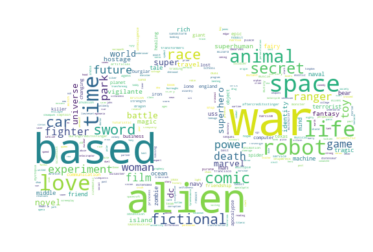

In [5]:
""" 
    Dealing with Keybords Section: Word Cloud
    
    Objetive: Word Cloud with most popular keybords from the first 100 movies with largest budget.

    Note: The installation of word cloud is necesary.
          Please insert the command lines you'll find in "https://github.com/amueller/word_cloud" 
          in the Anaconda CMD
          
"""

# Dataframe with the first 100 movies with largest budget.
dfMoreBudget = dfMain.sort_values(by= 'budget', ascending=False)
# List of the 100 movie ids with more bugdet.
peliculasMoreBudget = dfMoreBudget['movie_id'].tolist()
print(peliculasMoreBudget)
# Keybords from the 100 movies with more budget filtering by the previous ids.
dfKwsFiltered = dfKW[dfKW['movie_id'].isin(peliculasMoreBudget)]
# We aggrupate keybords by name, then sort them by count.
dfKwsFiltered = dfKwsFiltered.groupby(['name']).count().reset_index().sort_values(by="movie_id", ascending=False)
# Convert the dataframe to a list which only contains the sorted Keybords.
keybordsList = dfKwsFiltered['name'].tolist()
# Modifying the list, in order to separate each word by an empty space.
kbListString = " ".join(keybordsList)

# Obtaining the image mask - reading image.
myMask = np.array(Image.open("Imagenes\\chimpanzee.jpg"))
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg

# generate word cloud
wc = WordCloud(background_color="white", mask=myMask, max_words = 1000, width=2500, height=2000 ).generate(kbListString)
# Storing the file. (Careful with the directory)
wc.to_file("Plots\\MyWordCloud.png")
# showing the word cloud
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# Emptying variables
dfMoreBudget = []
peliculasMoreBudget = []
dfKwsFiltered = []
keybordsList = []
kbListString = []
miMask = []
wc = []

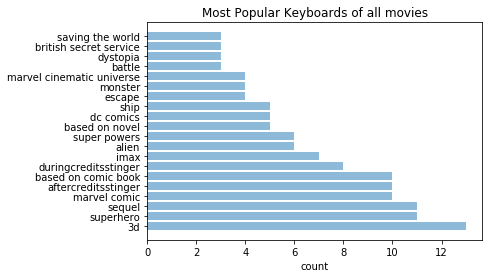

In [6]:
""" 
    Dealing with Keybords Section: Bar Plot
    
    Objetive:  10 most popular keyboards of all movies in the dataframe
"""

# We aggrupate keybords by name, then sort them by count.
dfKWGrouped = dfKW.groupby(['name']).count().reset_index()
# Renaming the column.
dfKWGrouped = dfKWGrouped.rename(columns ={"movie_id": 'count'})
# Sorting the keybords
dfKWGrouped = dfKWGrouped.sort_values(by="count", ascending=False)
# Obtaining the first 20 more popular keybords
dfKWGrouped = dfKWGrouped.head(20)
# Convert the dataframe to a list which only contains the sorted Keybords.
keybordsList = dfKWGrouped['name'].tolist()
# Convert the dataframe to a list which only contains the sorted Counts.
countList = dfKWGrouped['count'].tolist()
# Obtaining the length of the objects list
y_pos = np.arange(len(keybordsList))

# Creating the plot
plt.barh(y_pos, countList, align='center', alpha=0.5)
plt.yticks(y_pos, keybordsList)
plt.xlabel('count')
plt.title('Most Popular Keyboards of all movies')
# Showing the plot
plt.show()

